In [3]:
#import necessary packages

%matplotlib inline
%config InlineBackend.figure_format ='retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [4]:
### run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), 
                               transforms.Normalize((0.5,), (0.5,)),
                               ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


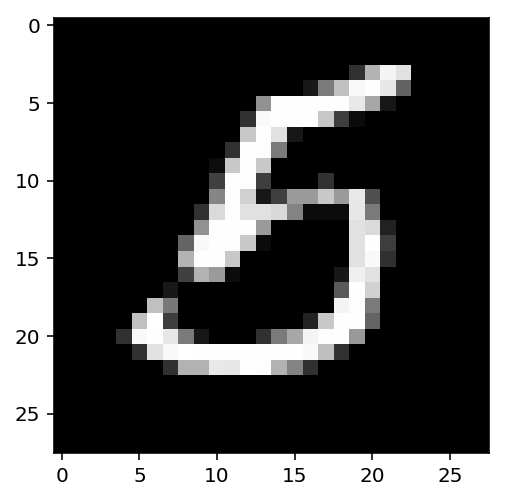

In [6]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [7]:
### Generate some data
torch.manual_seed(7)

# images will be the features which is 784 
inputs = images.view(images.shape[0], -1) #images.shape[0] is the batch size, negative one implies flattening the images
n_input = 784
n_hidden = 256
n_output = 10

#Weights for inputs to hidden layer
W1 = torch.randn(n_input, n_hidden)
#Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# and bias terms for hidden and output layer
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

def activation(x):
    return (1/(1 + torch.exp(-x)))

h = activation(torch.mm(inputs, W1) + B1)
output = activation(torch.mm(h, W2) + B2)
print(output)


tensor([[2.7052e-07, 1.0578e-01, 9.9638e-01, 6.1785e-08, 9.8445e-01, 9.9999e-01,
         2.1259e-02, 9.7440e-01, 8.3282e-06, 3.2776e-04],
        [4.8219e-06, 8.9509e-01, 9.7386e-01, 1.8341e-05, 1.0000e+00, 8.8992e-01,
         1.9481e-07, 9.9666e-01, 1.5797e-06, 2.9720e-04],
        [1.1500e-07, 5.4255e-03, 9.9429e-07, 9.1184e-07, 9.9995e-01, 9.9623e-01,
         6.6004e-01, 2.2883e-02, 1.2087e-06, 3.2880e-03],
        [7.8341e-09, 1.5535e-04, 5.7504e-05, 2.5550e-07, 9.7523e-01, 9.9999e-01,
         9.9798e-01, 8.3746e-03, 4.7992e-10, 2.1706e-01],
        [3.0073e-07, 1.9283e-02, 9.7715e-01, 6.2459e-05, 9.9960e-01, 9.4210e-01,
         2.5298e-05, 9.9859e-01, 9.2139e-09, 3.7475e-01],
        [2.2963e-07, 1.7942e-04, 5.7611e-01, 5.0258e-07, 5.1895e-01, 9.9882e-01,
         1.3866e-03, 2.5416e-01, 1.0065e-04, 3.3413e-02],
        [5.1768e-01, 9.8553e-07, 8.1201e-03, 1.9027e-01, 1.0000e+00, 9.9753e-01,
         9.4065e-03, 4.6700e-02, 7.9901e-06, 1.6864e-03],
        [1.4276e-09, 8.6269

In [8]:
def softmax(x):
    #implement softmax function
    return torch.exp(output)/torch.sum(torch.exp(output), dim = 1).view(-1, 1)
    #torch.sum(torch.exp(output), dim=1) take the sum across all the values of single row, ie sum all the columns

# Here, out should be the output of the network in the previous excercise with shape (64,10)
probabilities = softmax(output)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([0.1628, 0.1783, 0.1452, 0.1572, 0.1663, 0.1364, 0.1475, 0.1816, 0.1463,
        0.1574, 0.1405, 0.1333, 0.1628, 0.1385, 0.1516, 0.1705, 0.1347, 0.1461,
        0.1399, 0.1523, 0.1617, 0.1654, 0.1566, 0.1648, 0.1639, 0.1537, 0.1452,
        0.1597, 0.1785, 0.1573, 0.1449, 0.1640, 0.1585, 0.1515, 0.1546, 0.1418,
        0.1653, 0.1796, 0.1555, 0.1484, 0.1833, 0.1377, 0.1618, 0.1550, 0.1610,
        0.1717, 0.1447, 0.1619, 0.1689, 0.1703, 0.1521, 0.1500, 0.1539, 0.1720,
        0.1519, 0.1608, 0.1566, 0.1487, 0.1503, 0.1521, 0.1619, 0.1606, 0.1384,
        0.1544])
